# Case studies for Robot Test paper - NYC case

In [1]:
import os
import pandas as pd
import numpy as np
import datetime
import itertools
import matplotlib.pylab as plt
from matplotlib import rc
rc("text", usetex=True)
rc("font", family="serif")

import run_robot
import prepare_data
from importlib import reload
reload(prepare_data)
reload(run_robot)

Loading modules...
Loading modules... Ok!
Loading PyJulia module...
Loading PyJulia module... Ok!
Loading Robot-dance Julia module...
Loading Robot-dance Julia module... Ok!
Loading Julia library...
Loading Julia library... Ok!
Loading Robot-dance Julia module...
Loading Robot-dance Julia module... Ok!
Loading PyJulia module...
Loading PyJulia module... Ok!
Loading Robot-dance Julia module...
Loading Robot-dance Julia module... Ok!
Loading modules...
Loading modules... Ok!
Loading Julia library...
Loading Julia library... Ok!
Loading Robot-dance Julia module...
Loading Robot-dance Julia module... Ok!


<module 'run_robot' from '/home/pjssilva/documentos/pesquisa/robot_dance/code-nyc/run_robot.py'>

In [5]:
t0_day = "2020-04-23"
tests = pd.read_csv("data-nyc/tests_robot_dance.csv", parse_dates=[0])
tests

,date,tests
0,2020-02-29,0.000000
1,2020-03-01,0.000000
2,2020-03-02,0.000000
3,2020-03-03,0.000002
4,2020-03-04,0.000004
...,...,...
76,2020-05-15,0.001925
77,2020-05-16,0.001085
78,2020-05-17,0.000973
79,2020-05-18,0.002595


In [6]:
basic_prm = prepare_data.save_basic_parameters(min_level=0.8, rep=3.0, ndays=30, window=1)
subnot_factor = 1.0
cities_data, rt_profile = prepare_data.compute_initial_condition_evolve_and_save(basic_prm, "NJ", ["NYC"], 10000000, subnot_factor, 1, "data-nyc/nyc_robot_data.csv", t0_day=t0_day, tests=tests["tests"].values)
cities_data


 1/1 NYC                            Mean effective R in the last two weeks = 0.66


,S1,E1,I1,R1,population,icu_capacity,start_date
NYC,0.80119,0.020325,0.012795,0.165487,8336817,0.00048,2020-05-19


In [33]:
rt_profile

array([0.91617776, 0.91601075, 0.91571396, 0.88227717, 0.85177788,
       0.8516701 , 0.85163999, 0.85162558, 0.85161613, 0.85160832,
       0.85160047, 0.85159084, 0.85157507, 0.85152719, 0.82652593,
       0.82649167, 0.82648429, 0.82648138, 0.82647991, 0.82647906,
       0.82647854, 0.82647821, 0.82647799, 0.82647785, 0.82647778,
       0.82647774, 0.82647774, 0.82647777, 0.82647781, 0.82647787,
       0.82647793, 0.82647798, 0.82647803, 0.82647806, 0.82647807,
       0.82647808, 0.82647808])

In [34]:
tests_profile = tests[tests["date"] >= pd.to_datetime(t0_day)]
tests_profile = tests_profile["tests"].values
tests_profile

array([0.00135615, 0.0013937 , 0.00135843, 0.00147178, 0.00093573,
       0.00098239, 0.00167318, 0.00143856, 0.00167894, 0.00150069,
       0.00143592, 0.00092769, 0.00068743, 0.00157986, 0.00183379,
       0.001811  , 0.00166406, 0.00159869, 0.00092002, 0.00074513,
       0.00175751, 0.00179841, 0.00184171, 0.00179385, 0.00167618,
       0.00087036, 0.00073853, 0.00219316, 0.00238328, 0.0024002 ,
       0.00229404, 0.00192484, 0.00108507, 0.00097315, 0.00259547,
       0.00255481, 0.0032137 ])

In [35]:
# Define the basic data for the case studies

# Basic reproduction number
basic_rep = 3.0

# Simulation horizon
# A little more than a year when thevaccine should be here
ndays = len(rt_profile)

print(ndays, len(rt_profile), len(tests_profile))

# Mean time in ICU
time_icu = 7

# Lockdown level
lock_level = 0.6

# Define basic paramters
basic_prm = prepare_data.save_basic_parameters(min_level=lock_level, rep=basic_rep, time_icu=time_icu, ndays=ndays)

# Compute initial values

# For DRS
cities_data, rt_profile = prepare_data.compute_initial_condition_evolve_and_save(basic_prm, "NJ", [], 000000, subnot_factor, 1, "data-nyc/nyc_robot_data.csv", t0_day="2020-04-14", tests=tests["tests"].values)
cities_data

37 37 37

 1/1 NYC                            Mean effective R in the last two weeks = 0.69


,S1,E1,I1,R1,population,icu_capacity,start_date
NYC,0.835047,0.029292,0.017483,0.11804,8336817,0.00048,2020-05-20


In [36]:
t = [0.9179991083247093,0.9179991083247093,0.9179991083247093,0.9179991083247093,0.9179991083247093,0.9179991083247093,0.9179991083247093,0.9179991083247093,0.9179991083247093,0.9179991083247093,0.9179991083247093,0.9179991083247093,0.9179991083247093,0.9179991083247093,0.8257716552168826,0.8257716552168826,0.8257716552168826,0.8257716552168826,0.8257716552168826,0.8257716552168826,0.8257716552168826,0.8257716552168826,0.8257716552168826,0.8257716552168826,0.8257716552168826,0.8257716552168826,0.8257716552168826,0.8257716552168826,3.0,3.0,3.0]
len(t)

31

In [37]:
# Create a target matrix (max infected level)
ncities, ndays = len(cities_data.index), int(basic_prm["ndays"])
target = np.ones((ncities, ndays))
target = prepare_data.save_target(cities_data, target)

# Use a forcedif that releases the cities in the end
force_dif = np.ones((ncities, ndays))
cities_data

,S1,E1,I1,R1,population,icu_capacity,start_date
NYC,0.835047,0.029292,0.017483,0.11804,8336817,0.00048,2020-05-20


## Add information on the time series that estimate the need of ICUs

We are using the time series adjusted considering that the mean ICU stay is 7 days (which lead to larger ICU capacity).

In [38]:
if basic_prm["time_icu"] == 7:
    # Time series adjusted considering the mean ICU time is 7 days
    ts = np.array([0.00857702, 0.01956817, 0.00180512, 0.0, 1.97780974, -0.9797225, np.sqrt(6.326E-05), 0.009785159188786, 0.010250436563906])
else:
    raise NotImplementedError

ts_drs = np.ones((len(cities_data), len(ts)))
ts_drs *= ts
ts_drs = pd.DataFrame(data=ts_drs, index=cities_data.index, columns=[
    "rho_min", "rho_max", "intercept", "trend", "phi_1", "phi_2", "sigma_omega", "state0", "state_less_1"
])
ts_drs["confidence"] = 0.9
ts_drs["time_icu"] = time_icu
cities_data = pd.concat([cities_data, ts_drs], axis=1)
cities_data


,S1,E1,I1,R1,population,icu_capacity,start_date,rho_min,rho_max,intercept,trend,phi_1,phi_2,sigma_omega,state0,state_less_1,confidence,time_icu
NYC,0.835047,0.029292,0.017483,0.11804,8336817,0.00048,2020-05-20,0.008577,0.019568,0.001805,0.0,1.97781,-0.979723,0.007954,0.009785,0.01025,0.9,7


In [39]:
pd.set_option("display.width", 120)

# Simple function to run a test and save results
def run_a_test(basic_prm, result_file, figure_file, cities_data, M, target, force_dif, pools=None, budget=0, tests_off=np.zeros(0, int), tau=3, test_efficacy=0.8, daily_tests=0, proportional_tests=False, tests=np.zeros(0), fixed_rt=np.zeros(0), verbosity=1):
    run_robot.prepare_optimization(basic_prm, cities_data, M, target, hammer_data, force_dif, pools, 
        verbosity=verbosity, test_budget=budget, tests_off=tests_off, tau=tau, test_efficacy=test_efficacy, 
        daily_tests=daily_tests, proportional_tests=proportional_tests, tests=tests, fixed_rt=fixed_rt)
    run_robot.optimize_and_show_results(basic_prm, figure_file, result_file, cities_data, target, verbosity=verbosity)
    

In [40]:
# Define mobility matrix.
M = prepare_data.convert_mobility_matrix_and_save(cities_data, max_neighbors=1, drs="data-nyc/mobility_matrix.csv")
hammer_data = prepare_data.save_hammer_data(cities_data, 0, basic_prm["min_level"])
# run_robot.find_feasible_hammer(basic_prm, cities_data, M, target, hammer_data, out_file=None, 
#     incr_all=True, verbosity=1)
print("Hammer data", hammer_data)
M.loc["NYC", "NYC"]


Hammer data      duration  level
NYC         0    0.6


0.0

In [41]:
all_tau = [2] #[1, 2, 3, 4, 5]
all_test_efficacy = [0.8] #[0.7, 0.8, 0.9]
all_daily_tests = [30000] #[30000] , 50000]
all_budgets = [20000000] #[0, 5000000, 10000000, 20000000]

## Test experiments

### 1 Fix rt and tests as performed

******************** Running tau = 2 test_effic = 0.8 daily tests = 0 budget = 0
******************** Test fixed on original values
Solving Robot-dance...
Solving Robot-dance... Ok!
Total tests used 492601.0
Saving output files...
Saving output files... Ok!
Ploting result...
Ploting result... OK!


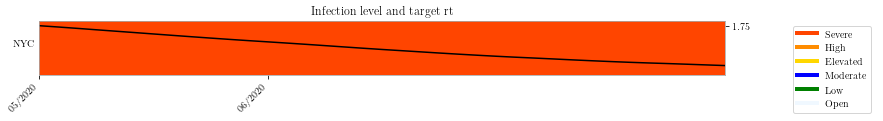

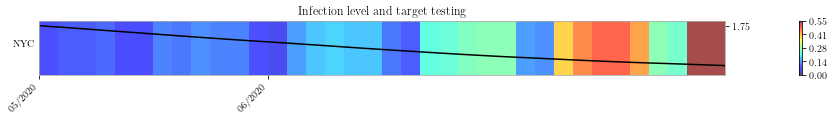

In [42]:
tau, test_efficacy = 2, 0.8
daily_tests, budget = 0, 0

print("******************** Running tau =", tau, "test_effic =", test_efficacy, "daily tests =", daily_tests, "budget =", budget)
print("******************** Test fixed on original values")

# Case 1 - Test fixed
basic_prm["alternate"] = 0.0
tests_off = np.zeros(0, int)
result_file =  f"results/original_tests_nyc.csv"
figure_file = f"results/original_tests_nyc.png"
run_a_test(basic_prm, result_file, figure_file, cities_data, M, target, force_dif, None, budget, tests_off, 
    tau, test_efficacy, daily_tests, False, tests=tests_profile, fixed_rt=rt_profile);


******************** Running tau = 2 test_effic = 0.8 daily tests = 0 budget = 0
******************** Test with zero tests
Solving Robot-dance...
Solving Robot-dance... Ok!
Total tests used 0.0
Saving output files...
Saving output files... Ok!
Ploting result...
Ploting result... OK!


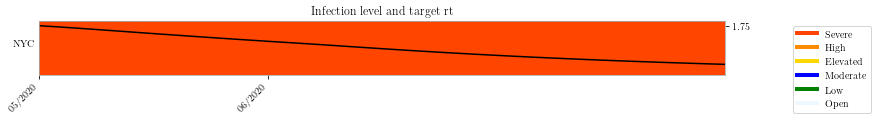

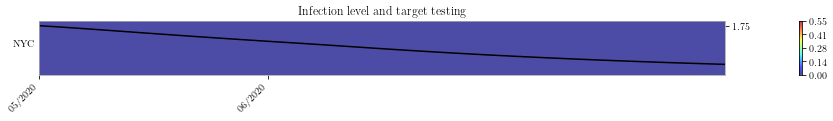

In [43]:
tau, test_efficacy = 2, 0.8
daily_tests, budget = 0, 0

print("******************** Running tau =", tau, "test_effic =", test_efficacy, "daily tests =", daily_tests, "budget =", budget)
print("******************** Test with zero tests")

# Case 1 - Test fixed
basic_prm["alternate"] = 0.0
tests_off = np.zeros(0, int)
result_file =  f"results/no_tests_nyc.csv"
figure_file = f"results/no_tests_nyc.png"
run_a_test(basic_prm, result_file, figure_file, cities_data, M, 2.0*target, force_dif, None, budget, tests_off, 
    tau, test_efficacy, daily_tests, False, tests=np.zeros(0), fixed_rt=rt_profile);

******************** Running tau = 2 test_effic = 0.8 daily tests = 492601.00000000006 budget = 492601.00000000006
******************** Test with zero tests
Solving Robot-dance...
Solving Robot-dance... Ok!
Total tests used 492600.6915894503
Saving output files...
Saving output files... Ok!
Ploting result...
Ploting result... OK!


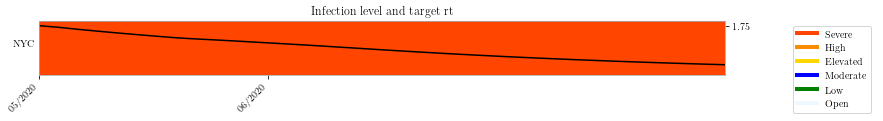

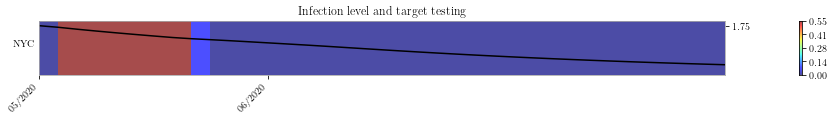

In [44]:
tau, test_efficacy = 2, 0.8
pop = cities_data.loc["NYC", "population"]
total_tests = sum(tests_profile)*pop
daily_tests, budget = total_tests, total_tests

print("******************** Running tau =", tau, "test_effic =", test_efficacy, "daily tests =", daily_tests, "budget =", budget)
print("******************** Test with zero tests")

# Case 1 - Test fixed
basic_prm["alternate"] = 0.0
tests_off = np.zeros(0, int)
result_file =  f"results/optimal_tests_nyc.csv"
figure_file = f"results/optimal_tests_nyc.png"
run_a_test(basic_prm, result_file, figure_file, cities_data, M, 2.0*target, force_dif, None, budget, tests_off, 
    tau, test_efficacy, daily_tests, False, tests=np.zeros(0), fixed_rt=rt_profile);

******************** Running tau = 2 test_effic = 0.8 daily tests = 492601.00000000006 budget = 4926010.000000001
******************** Test with zero tests
Solving Robot-dance...
Solving Robot-dance... Ok!
Total tests used 1506103.8589907645
Saving output files...
Saving output files... Ok!
Ploting result...
Ploting result... OK!


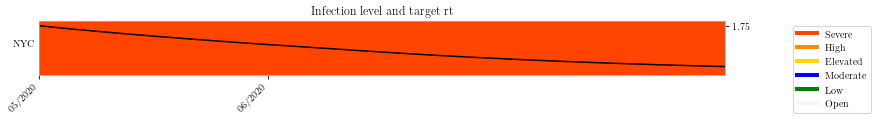

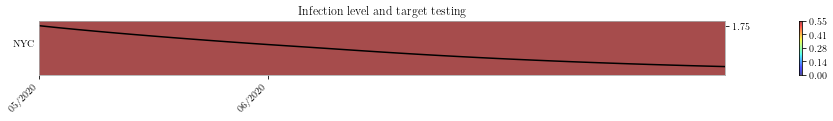

In [45]:
tau, test_efficacy = 2, 0.8
pop = cities_data.loc["NYC", "population"]
total_tests = sum(tests_profile)*pop
daily_tests, budget = total_tests, 10*total_tests

print("******************** Running tau =", tau, "test_effic =", test_efficacy, "daily tests =", daily_tests, "budget =", budget)
print("******************** Test with zero tests")

# Case 1 - Test fixed
basic_prm["alternate"] = 0.0
tests_off = np.zeros(0, int)
result_file =  f"results/optimal_tests_extra_budget_nyc.csv"
figure_file = f"results/optimal_tests_extra_budget_nyc.png"
run_a_test(basic_prm, result_file, figure_file, cities_data, M, 2.0*target, force_dif, None, budget, tests_off, 
    tau, test_efficacy, daily_tests, False, tests=np.zeros(0), fixed_rt=rt_profile);